#Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree


In [ ]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [ ]:
iris=load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

#Data Preprocessing

In [ ]:
data=pd.DataFrame(data=iris.data, columns=iris.feature_names)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
tar=pd.DataFrame(data=iris.target, columns=["Species"])
tar

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
data=pd.concat([data, tar], axis=1)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
data.shape

(150, 5)

#Data Visualization

In [ ]:
data["Species"].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

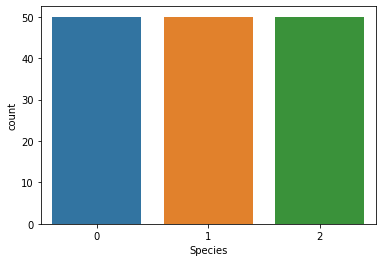

In [ ]:
sns.countplot(data["Species"])

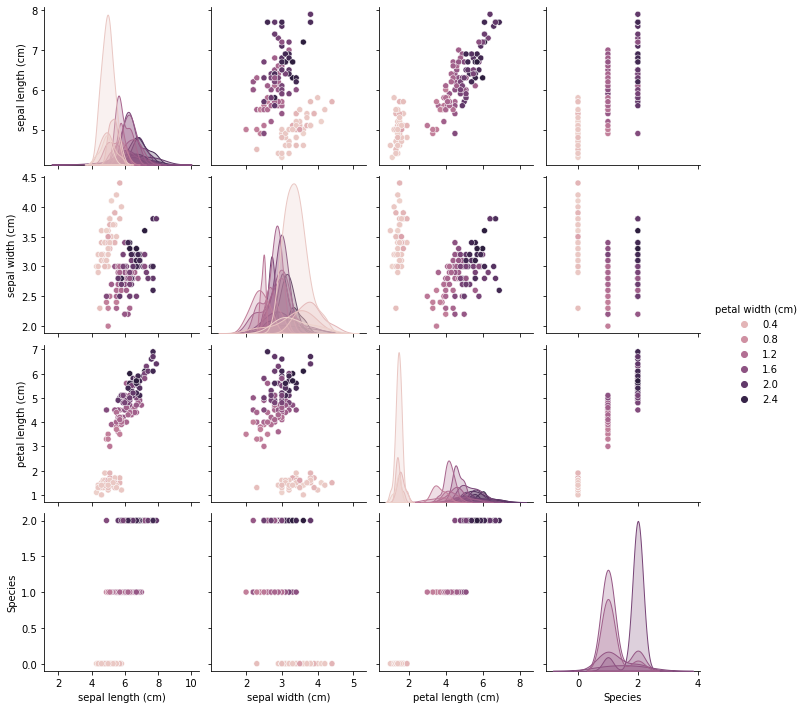

In [ ]:
sns.pairplot(data, hue='petal width (cm)')

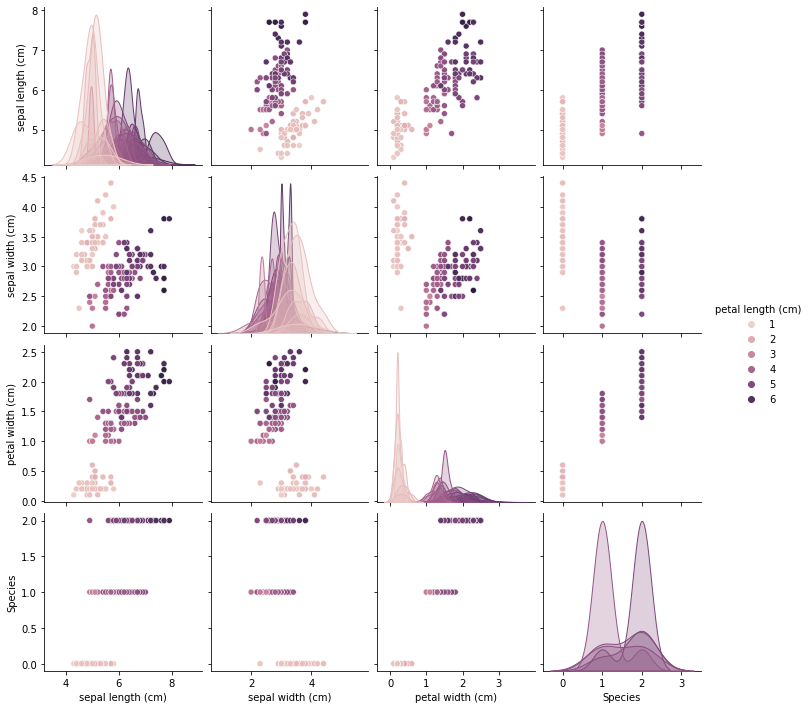

In [ ]:
sns.pairplot(data, hue='petal length (cm)')

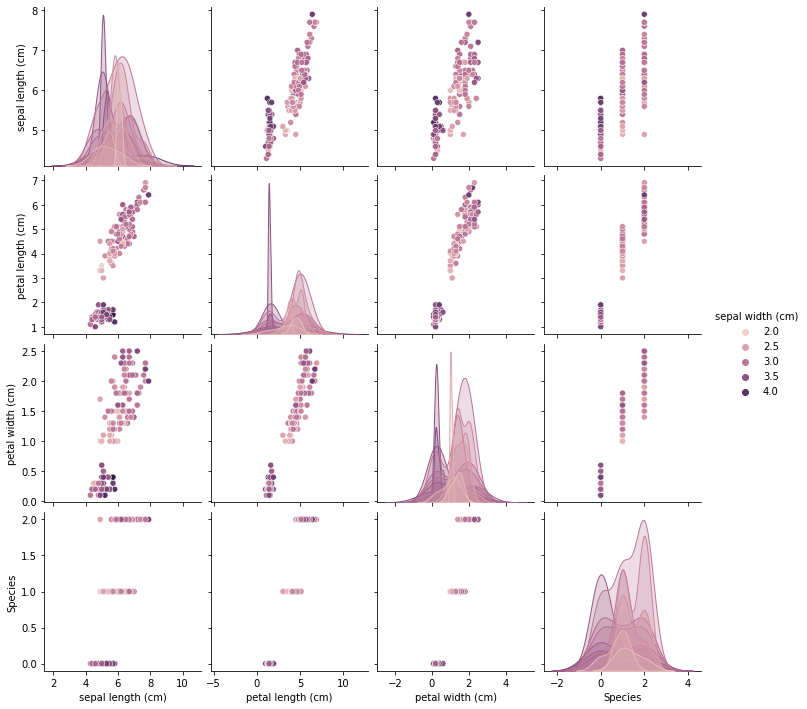

In [ ]:
sns.pairplot(data, hue='sepal width (cm)')

In [ ]:
cor = data.corr()
cor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


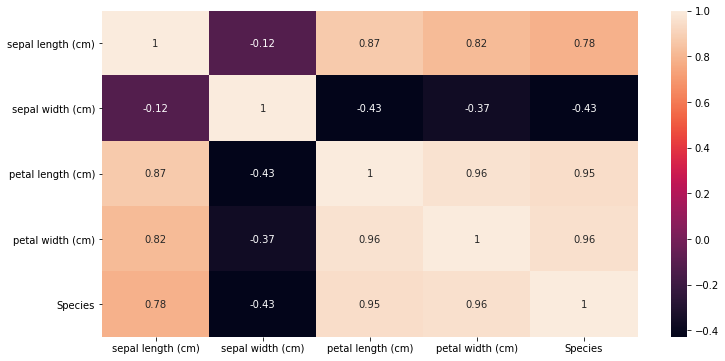

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data = cor, annot = True)

In [ ]:
cor['Species'].sort_values(ascending = False)

Species              1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)    -0.426658
Name: Species, dtype: float64

In [ ]:
x = ['petal width (cm)', 'petal length (cm)', 'sepal length (cm)']
x = data[x]
x

,petal width (cm),petal length (cm),sepal length (cm)
0,0.2,1.4,5.1
1,0.2,1.4,4.9
2,0.2,1.3,4.7
3,0.2,1.5,4.6
4,0.2,1.4,5.0
...,...,...,...
145,2.3,5.2,6.7
146,1.9,5.0,6.3
147,2.0,5.2,6.5
148,2.3,5.4,6.2


In [ ]:
y = data['Species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

#Splitting data in train and test and applying model

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_predict = classifier.predict(xtest)
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [ ]:
#Comparing actual values and predicted values
compare_data = pd.DataFrame({'Actual': ytest, 'Predicted': y_predict})
compare_data.head()

,Actual,Predicted
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0


In [ ]:
print('Mean Absolute Error: {}'.format(mean_absolute_error(ytest, y_predict)))
print('Mean Squared Error: {}'.format(mean_squared_error(ytest, y_predict)))
print('Root Mean Squared Error: {}'.format(np.sqrt(mean_squared_error(ytest, y_predict))))
print("Accuracy_score is: {}%".format(accuracy_score(ytest, y_predict)*100))

Mean Absolute Error: 0.05263157894736842
Mean Squared Error: 0.05263157894736842
Root Mean Squared Error: 0.22941573387056177
Accuracy_score is: 94.73684210526315%


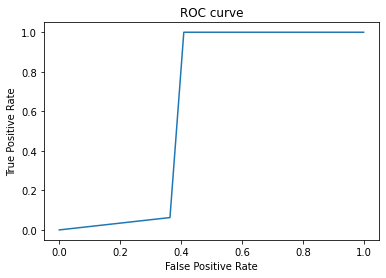

AUC value is 0.6264204545454545 


In [ ]:
fpr, tpr, threshold= roc_curve(ytest, y_predict, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

In [ ]:
print("classification Report:")
print(classification_report(ytest,y_predict))

classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        16
           2       0.89      0.89      0.89         9

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



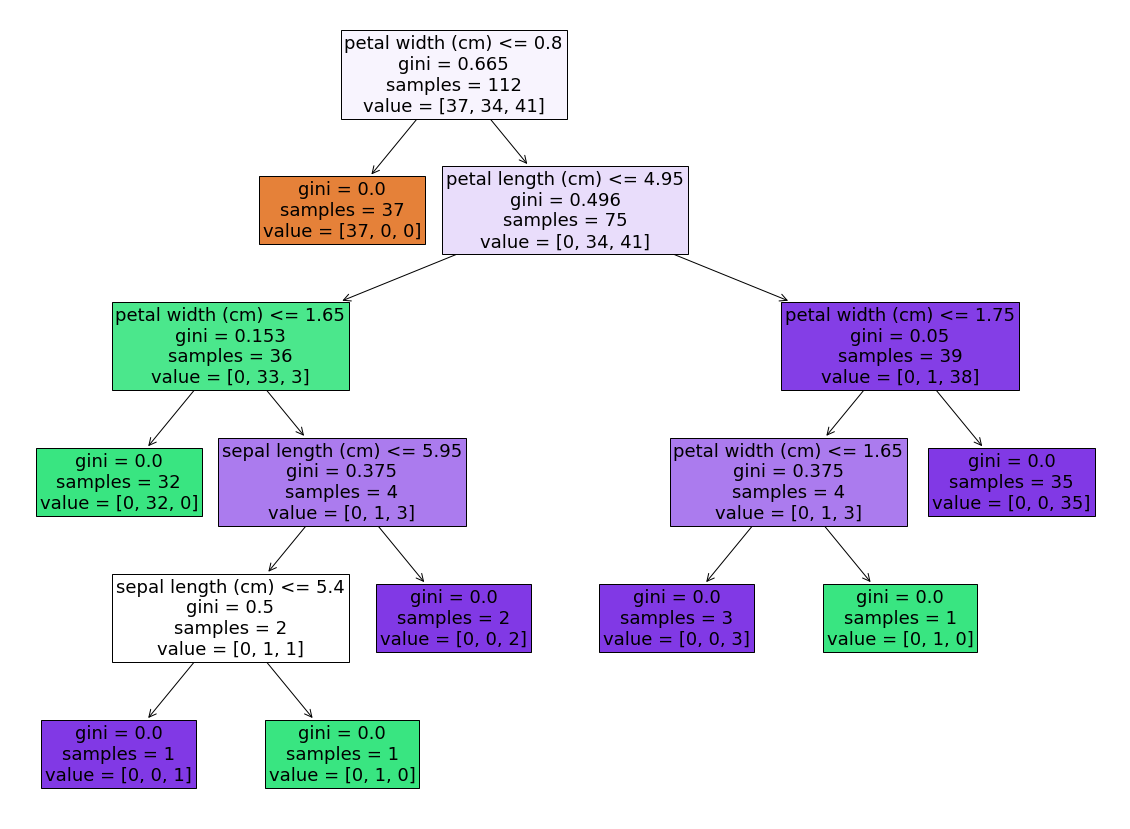

In [ ]:
#Visualizing Tree
plt.figure(figsize=(20,15))
model_plot = tree.plot_tree(classifier, feature_names = x.columns, filled=True, fontsize=18)

#Predicting Using custom Input

In [ ]:
 new_data = xtest.iloc[:5,:]
 y_new = ytest.iloc[:5]
 new_data

,petal width (cm),petal length (cm),sepal length (cm)
114,2.4,5.1,5.8
62,1.0,4.0,6.0
33,0.2,1.4,5.5
107,1.8,6.3,7.3
7,0.2,1.5,5.0


In [ ]:
custom_predict = classifier.predict(new_data)

In [ ]:
name = []
original_name = []
for i in custom_predict:
  if i==0:
    name.append(iris.target_names[0])
  elif i==1:
    name.append(iris.target_names[1])
  else:
    name.append(iris.target_names[2])

for i in y_new:
  if i==0:
    original_name.append(iris.target_names[0])
  elif i==1:
    original_name.append(iris.target_names[1])
  else:
    original_name.append(iris.target_names[2])

new_data["Predicted Name"] = name
new_data["Original Name"] = original_name
new_data

,petal width (cm),petal length (cm),sepal length (cm),Predicted Name,Original Name
114,2.4,5.1,5.8,virginica,virginica
62,1.0,4.0,6.0,versicolor,versicolor
33,0.2,1.4,5.5,setosa,setosa
107,1.8,6.3,7.3,virginica,virginica
7,0.2,1.5,5.0,setosa,setosa
